In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import sklearn

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Employee.csv')

In [3]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df['Education'] = df['Education'].astype('category')
df['City'] = df['City'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['EverBenched'] = df['EverBenched'].astype('category')
print(df.dtypes)

Education                    category
JoiningYear                     int64
City                         category
PaymentTier                     int64
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
LeaveOrNot                      int64
dtype: object


In [7]:
df['Education'] = df['Education'].cat.codes
df['City'] = df['City'].cat.codes
df['Gender'] = df['Gender'].cat.codes
df['EverBenched'] = df['EverBenched'].cat.codes
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


<Axes: xlabel='Age'>

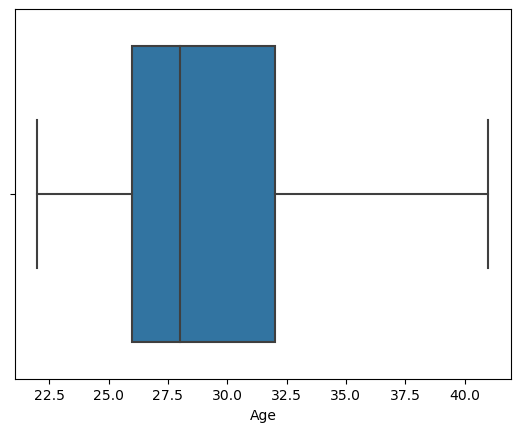

In [8]:
sns.boxplot(x='Age', data=df)

In [9]:
df.shape

(4653, 9)

In [10]:
selected_data2 = df[['LeaveOrNot']]
X = df.drop('LeaveOrNot', axis = 1)
y = selected_data2

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3722, 8)
(3722, 1)
(931, 8)
(931, 1)


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [14]:
clf.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [15]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8238453276047261


In [17]:
df_test = pd.read_csv(r'C:\Users\USER\Desktop\EEEEE.csv')

In [18]:
df_test.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,PHD,2013,Bangalore,3,31,Female,No,3
1,Bachelor,2013,Bangalore,2,38,Male,Yes,7
2,Bachelor,2018,Bangalore,3,38,Female,Yes,7
3,Master,2015,New Delhi,3,31,Female,No,4
4,PHD,2016,Bangalore,3,36,Male,No,5


In [19]:
df_test['Education'] = df_test['Education'].astype('category')
df_test['City'] = df_test['City'].astype('category')
df_test['Gender'] = df_test['Gender'].astype('category')
df_test['EverBenched'] = df_test['EverBenched'].astype('category')
print(df_test.dtypes)

Education                    category
JoiningYear                     int64
City                         category
PaymentTier                     int64
Age                             int64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain       int64
dtype: object


In [20]:
df_test['Education'] = df_test['Education'].cat.codes
df_test['City'] = df_test['City'].cat.codes
df_test['Gender'] = df_test['Gender'].cat.codes
df_test['EverBenched'] = df_test['EverBenched'].cat.codes
df_test.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,2,2013,0,3,31,0,0,3
1,0,2013,0,2,38,1,1,7
2,0,2018,0,3,38,0,1,7
3,1,2015,1,3,31,0,0,4
4,2,2016,0,3,36,1,0,5


In [21]:
selected_data2 = df_test[['Education','JoiningYear','City','PaymentTier','Age','Gender','EverBenched','ExperienceInCurrentDomain']]

In [22]:
pree = clf.predict(selected_data2)

In [23]:
df_test['LeaveOrNot'] = pree

In [24]:
df_test

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,2,2013,0,3,31,0,0,3,0
1,0,2013,0,2,38,1,1,7,0
2,0,2018,0,3,38,0,1,7,1
3,1,2015,1,3,31,0,0,4,0
4,2,2016,0,3,36,1,0,5,0
5,2,2013,0,1,37,0,1,3,0
6,0,2017,2,1,32,0,0,4,1
7,2,2016,1,3,25,0,0,6,0
8,2,2016,2,3,40,0,1,3,1
9,2,2016,2,1,40,0,0,4,0


In [25]:
df_test['LeaveOrNot'] = df_test['LeaveOrNot'].replace({0: 'No', 1: 'Yes'})

In [26]:
df_test

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,2,2013,0,3,31,0,0,3,No
1,0,2013,0,2,38,1,1,7,No
2,0,2018,0,3,38,0,1,7,Yes
3,1,2015,1,3,31,0,0,4,No
4,2,2016,0,3,36,1,0,5,No
5,2,2013,0,1,37,0,1,3,No
6,0,2017,2,1,32,0,0,4,Yes
7,2,2016,1,3,25,0,0,6,No
8,2,2016,2,3,40,0,1,3,Yes
9,2,2016,2,1,40,0,0,4,No
